<a href="https://colab.research.google.com/github/Tarique2002/Glucose-Monitoring-Prediction/blob/main/Glucose_Monitoring_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Glucose Monitoring Prediction Project
# Author: Your Name

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# 1. Load dataset
# -----------------------------
# Example dataset: Pima Indians Diabetes Dataset
# Download from: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
data = pd.read_csv("/content/diabetes.csv")

# Preview data
print("Dataset Preview:")
print(data.head())

# -----------------------------
# 2. Features & Target
# -----------------------------
X = data.drop("Glucose", axis=1)   # Input features (Age, BMI, Insulin, etc.)
y = data["Glucose"]                # Target (Glucose level)

# -----------------------------
# 3. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 4. Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 5. Model Training
# -----------------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# -----------------------------
# 6. Predictions
# -----------------------------
y_pred = model.predict(X_test_scaled)

# -----------------------------
# 7. Evaluation
# -----------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# -----------------------------
# 8. Predict Glucose for New Patient
# -----------------------------
# Example: Age=35, BMI=28.5, Insulin=90, Pregnancies=2, SkinThickness=32, BloodPressure=70, DiabetesPedigreeFunction=0.5, Outcome=0
new_patient = np.array([[2, 90, 70, 32, 28.5, 0.5, 35, 0]])  # Adjust order according to dataset
new_patient_scaled = scaler.transform(new_patient)
predicted_glucose = model.predict(new_patient_scaled)

print(f"\n🧪 Predicted Glucose Level for New Patient: {predicted_glucose[0]:.2f}")


Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

📊 Model Performance:
Mean Absolute Error: 20.96
Root Mean Squared Error: 26.37
R² Score: 0.31

🧪 Predicted Glucose Level for New Patient: 106.01


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


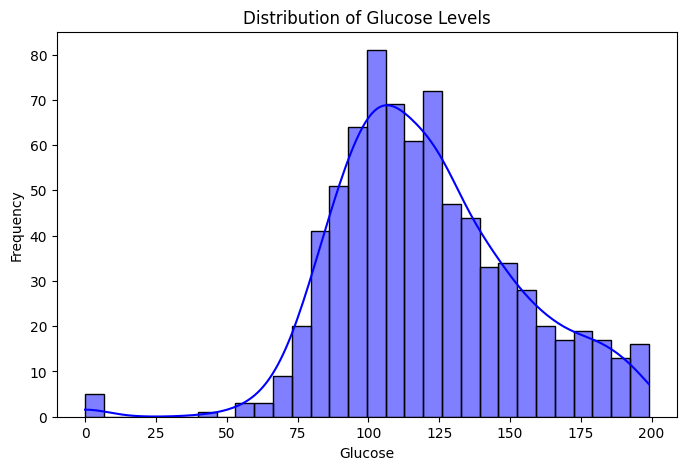

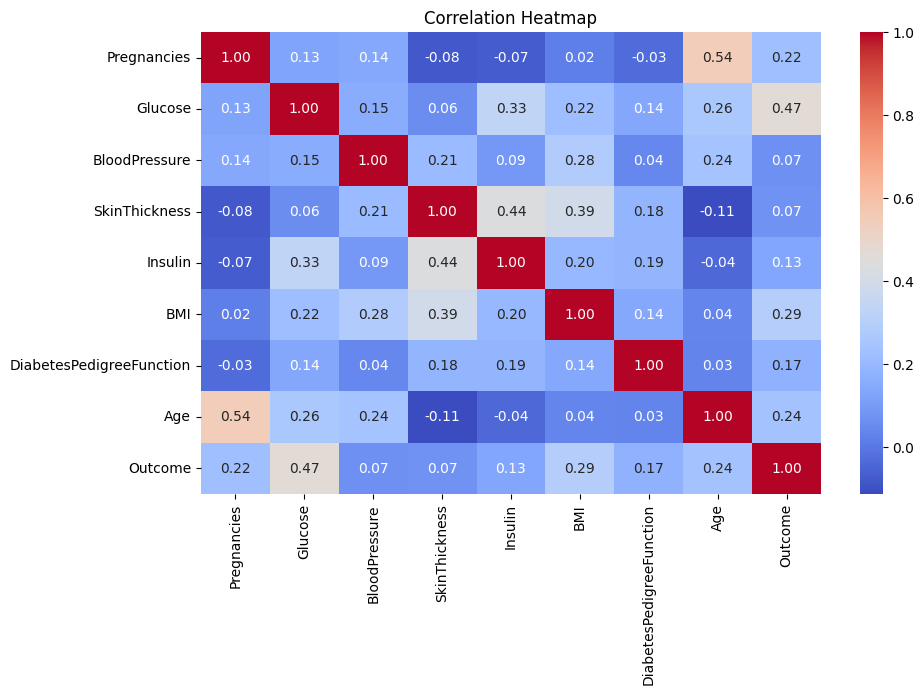

/tmp/ipython-input-759967338.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Glucose", data=data, palette="Set2")


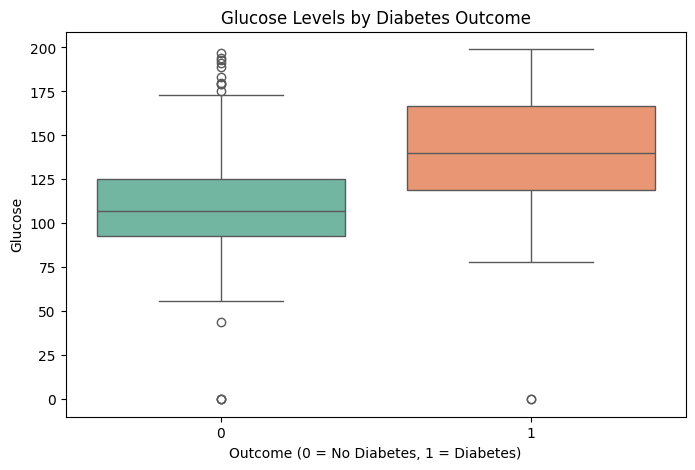

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
data = pd.read_csv(url)

# -----------------------------
# 1. Histogram of Glucose Levels
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(data["Glucose"], bins=30, kde=True, color="blue")
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

# -----------------------------
# 2. Correlation Heatmap
# -----------------------------
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# 3. Boxplot: Outcome vs Glucose
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="Glucose", data=data, palette="Set2")
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Glucose")
plt.show()
